In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [49]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional

Using TensorFlow backend.


In [2]:
temperatures = pd.read_csv('GlobalTemperatures.csv')
temperatures.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
dt                                           3192 non-null object
LandAverageTemperature                       3180 non-null float64
LandAverageTemperatureUncertainty            3180 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
dtypes: float64(8), object(1)
memory usage: 224.5+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028D09A87128>,
      dtype=object)

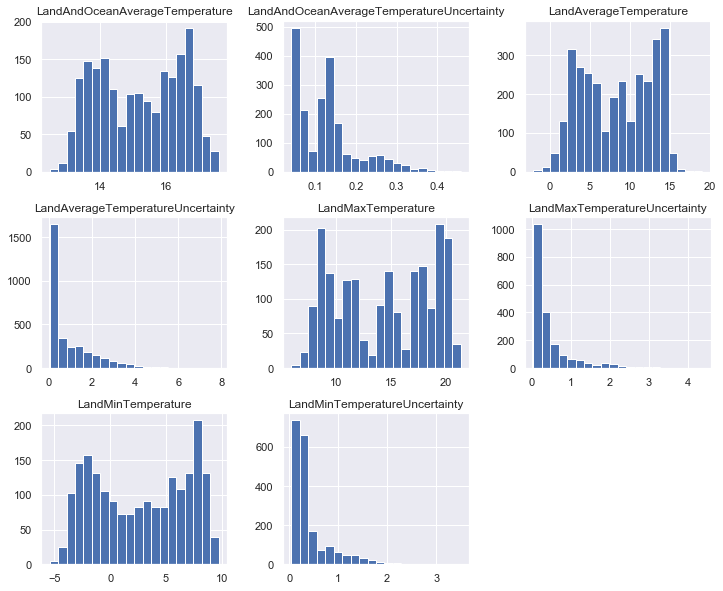

In [4]:
temperatures.hist(bins=20, figsize=(12,10))

In [5]:
temperatures.dt = pd.to_datetime(temperatures.dt).dt.strftime('%Y-%m')

In [6]:
#check if there is some missing date
start_date = pd.to_datetime(temperatures.dt.iloc[0])
end_date = pd.to_datetime(temperatures.dt.iloc[-1]) + pd.DateOffset(months=1)
range_M = pd.date_range(start=start_date, end=end_date, freq='M')
print('Monthly period length from data = {}'.format(len(temperatures.dt)))
print('Monthly period length from calendar = {}'.format(len(range_M)))
print('Number of unique dates: {}'.format(len(temperatures.dt.unique())))

Monthly period length from data = 3192
Monthly period length from calendar = 3192
Number of unique dates: 3192


In [7]:
x = range(0, len(temperatures))

Text(0.5, 1.0, 'Average Land Temperature')

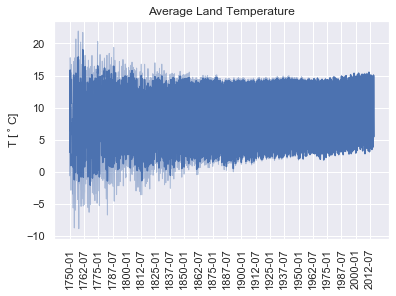

In [8]:
low_vals = temperatures.LandAverageTemperature - temperatures.LandAverageTemperatureUncertainty
upp_vals = temperatures.LandAverageTemperature + temperatures.LandAverageTemperatureUncertainty
plt.plot(x, temperatures.LandAverageTemperature)
plt.fill_between(x, low_vals, upp_vals, color='b', alpha=0.4)
plt.xticks(x[::150], temperatures.dt.iloc[::150], rotation=90)
plt.ylabel('T [$^\circ$C]')
plt.title('Average Land Temperature')

Text(0.5, 1.0, 'Minimum Land Temperature')

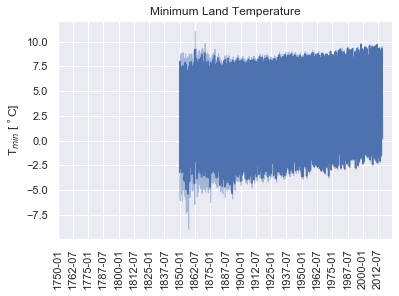

In [9]:
low_vals_min = temperatures.LandMinTemperature - temperatures.LandMinTemperatureUncertainty
upp_vals_min = temperatures.LandMinTemperature + temperatures.LandMinTemperatureUncertainty
plt.plot(x, temperatures.LandMinTemperature)
plt.fill_between(x, low_vals_min, upp_vals_min, color='b', alpha=0.4)
plt.xticks(x[::150], temperatures.dt.iloc[::150], rotation=90)
plt.ylabel('T$_{min}$ [$^\circ$C]')
plt.title('Minimum Land Temperature')

Text(0.5, 1.0, 'Maximum Land Temperature')

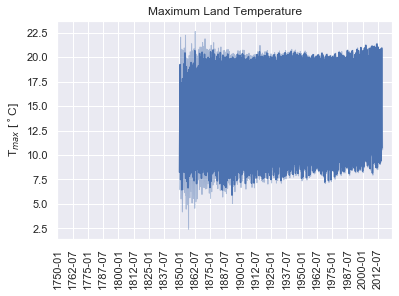

In [10]:
low_vals_max = temperatures.LandMaxTemperature - temperatures.LandMaxTemperatureUncertainty
upp_vals_max = temperatures.LandMaxTemperature + temperatures.LandMaxTemperatureUncertainty
plt.plot(x, temperatures.LandMaxTemperature)
plt.fill_between(x, low_vals_max, upp_vals_max, color='b', alpha=0.4)
plt.xticks(x[::150], temperatures.dt.iloc[::150], rotation=90)
plt.ylabel('T$_{max}$ [$^\circ$C]')
plt.title('Maximum Land Temperature')

Text(0.5, 1.0, 'Average Land and Ocean Temperature')

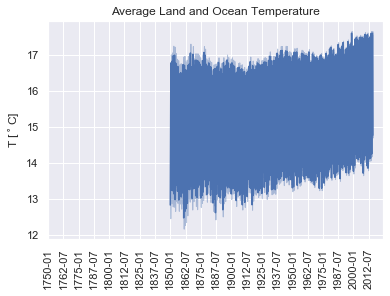

In [11]:
low_vals_oc = temperatures.LandAndOceanAverageTemperature - temperatures.LandAndOceanAverageTemperatureUncertainty
upp_vals_oc = temperatures.LandAndOceanAverageTemperature + temperatures.LandAndOceanAverageTemperatureUncertainty
plt.plot(x, temperatures.LandAndOceanAverageTemperature)
plt.fill_between(x, low_vals_oc, upp_vals_oc, color='b', alpha=0.4)
plt.xticks(x[::150], temperatures.dt.iloc[::150], rotation=90)
plt.ylabel('T [$^\circ$C]')
plt.title('Average Land and Ocean Temperature')

# Yearly averages

In [16]:
temperatures_yearly = temperatures.groupby(
    temperatures.dt.str.extract('(\d{4})', expand=False)).agg({'LandAverageTemperature': np.nanmean,
                                    'LandAverageTemperatureUncertainty': lambda v: np.sqrt(np.nansum(v**2.0))/len(v),
                                    'LandMaxTemperature': np.nanmean,
                                    'LandMaxTemperatureUncertainty': lambda v: np.sqrt(np.nansum(v**2.0))/len(v),
                                    'LandMinTemperature': np.nanmean,
                                    'LandMinTemperatureUncertainty': lambda v: np.sqrt(np.nansum(v**2.0))/len(v),
                                    'LandAndOceanAverageTemperature': np.nanmean,
                                    'LandAndOceanAverageTemperatureUncertainty': lambda v: np.sqrt(np.nansum(v**2.0))/len(v)}
                                    ).reset_index()

In [44]:
temperatures_yearly.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750,8.719364,0.748772,NaN,0.0,NaN,0.0,NaN,0.0
1,1751,7.976143,0.630065,NaN,0.0,NaN,0.0,NaN,0.0
2,1752,5.779833,0.614176,NaN,0.0,NaN,0.0,NaN,0.0
3,1753,8.388083,0.970134,NaN,0.0,NaN,0.0,NaN,0.0
4,1754,8.469333,1.091063,NaN,0.0,NaN,0.0,NaN,0.0


In [19]:
temperatures_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 9 columns):
dt                                           266 non-null object
LandAverageTemperature                       266 non-null float64
LandAverageTemperatureUncertainty            266 non-null float64
LandMaxTemperature                           166 non-null float64
LandMaxTemperatureUncertainty                266 non-null float64
LandMinTemperature                           166 non-null float64
LandMinTemperatureUncertainty                266 non-null float64
LandAndOceanAverageTemperature               166 non-null float64
LandAndOceanAverageTemperatureUncertainty    266 non-null float64
dtypes: float64(8), object(1)
memory usage: 18.8+ KB


In [20]:
x1 = range(0, len(temperatures_yearly))

Text(0.5, 1.0, 'Land Temperature')

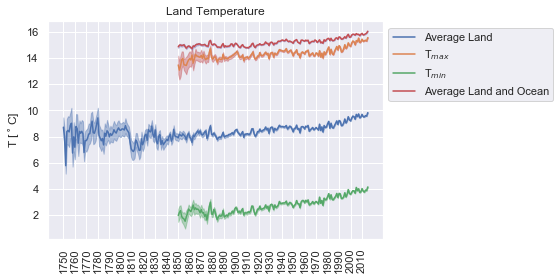

In [39]:
#average land
low_vals = temperatures_yearly.LandAverageTemperature - temperatures_yearly.LandAverageTemperatureUncertainty
upp_vals = temperatures_yearly.LandAverageTemperature + temperatures_yearly.LandAverageTemperatureUncertainty
#min
low_vals_min = temperatures_yearly.LandMinTemperature - temperatures_yearly.LandMinTemperatureUncertainty
upp_vals_min = temperatures_yearly.LandMinTemperature + temperatures_yearly.LandMinTemperatureUncertainty
#max
low_vals_max = temperatures_yearly.LandMaxTemperature - temperatures_yearly.LandMaxTemperatureUncertainty
upp_vals_max = temperatures_yearly.LandMaxTemperature + temperatures_yearly.LandMaxTemperatureUncertainty
#average land and ocean
low_vals_oc = temperatures_yearly.LandAndOceanAverageTemperature - temperatures_yearly.LandAndOceanAverageTemperatureUncertainty
upp_vals_oc = temperatures_yearly.LandAndOceanAverageTemperature + temperatures_yearly.LandAndOceanAverageTemperatureUncertainty

plt.plot(x1, temperatures_yearly.LandAverageTemperature, label='Average Land')
plt.fill_between(x1, low_vals, upp_vals, color='b', alpha=0.4)
plt.plot(x1, temperatures_yearly.LandMaxTemperature, label='T$_{max}$')
plt.fill_between(x1, low_vals_max, upp_vals_max, color='r', alpha=0.4)
plt.plot(x1, temperatures_yearly.LandMinTemperature, label='T$_{min}$')
plt.fill_between(x1, low_vals_min, upp_vals_min, color='g', alpha=0.4)
plt.plot(x1, temperatures_yearly.LandAndOceanAverageTemperature, label='Average Land and Ocean')
plt.fill_between(x1, low_vals_oc, upp_vals_oc, color='m', alpha=0.4)
plt.xticks(x1[::10], temperatures_yearly.dt.iloc[::10], rotation=90)
plt.ylabel('T [$^\circ$C]')
plt.legend(ncol=1, loc='center left', bbox_to_anchor=(1, 0.8))
plt.title('Land Temperature')

In [48]:
#find starting year of the min, max and land and ocean time series
starting_year = temperatures_yearly.dropna().dt.iloc[0]
starting_idx = np.where(temperatures_yearly.dt == starting_year)[0][0]
print('Starting year: {}'.format(starting_year))

Starting year: 1850
